# Reducción de Dimensionalidad Lineal y No Lineal

## Importar librerías requeridas

En la siguiente casilla importaremos los módulos necesarias para crear las visualizaciones.

In [1]:
# Importar el módulo pyplot de matplotlib y abreviarlo a plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time

# Importar el dataset de imágenes de dígitos
from sklearn.datasets import load_digits, load_iris

# Importar las librerías con los métodos de reducción de dimensionalidad
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## Ejemplo 1: Datos de flores Iris

El dataset que cargaremos es de distintas especies de flores del tipo Iris

In [2]:
iris = sns.load_dataset("iris")

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Supongamos que sólo con las dos primeras dimensiones (sepal length y sepal width) podemos **separar** los tres tipos de flores. Vemos que si bien la clase setosa queda bien separada, las clases versicolor y virginica están bastante mezcladas.

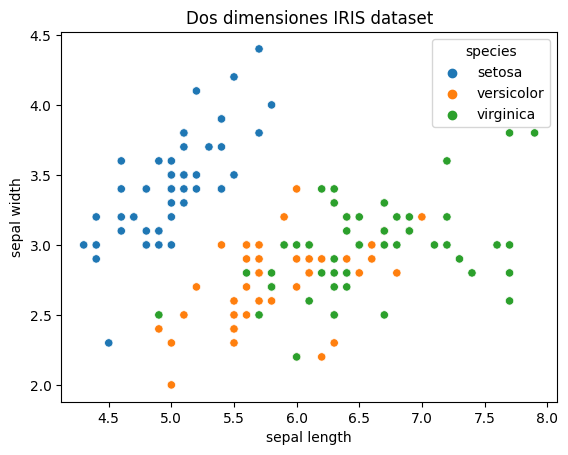

In [3]:
sns.scatterplot(iris, x="sepal_length", y="sepal_width", hue="species")
 
plt.title('Dos dimensiones IRIS dataset')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

## Realizar reducción de dimensionalidad con PCA

Recordemos que el método PCA (Análisis de componentes principales) nos permite disminuir la cantidad de dimensiones con las que representamos cada datos, pero intentando conservar la varianza total del dataset original.

Vemos que luego de reducir las 4 dimensiones originales a dos dimensiones luego de hacer PCA, las clases virginica y versicolor están más claramente separadas.

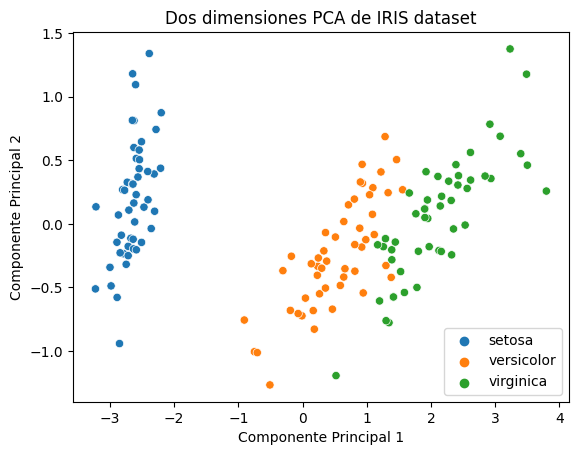

In [4]:
X = iris.to_numpy()[:, :4]

# ejecutar PCA
pca = PCA(n_components=2)

#guardar los datos transformados en un arreglo X_r
X_r = pca.fit(X).transform(X)
data = pd.DataFrame(X_r)
data["species"] = iris["species"]

sns.scatterplot(data, x=0, y=1, hue="species")
    
# configurar el gráfico    
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Dos dimensiones PCA de IRIS dataset')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

plt.show()

## Ejemplo 2: Dataset de Dígitos

A continuación veremos un ejemplo con un dataset de dígitos escritos a mano, digitalizados.

In [5]:
# cargamos el dataset de dígitos
digits = load_digits()
digits.data.shape

(1797, 64)

Vemos que cada "fila" del dataset es una imagen de 8x8 pixels (64 en total). Podemos visualizar uno cualquiera de esta forma: 

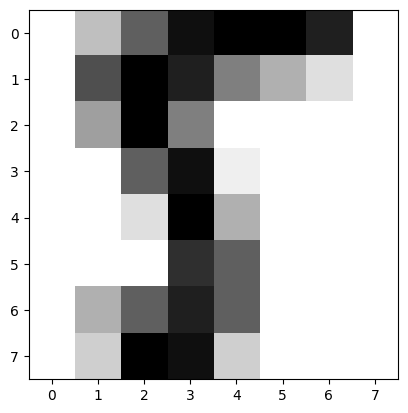

In [6]:
# Dibujemos la imagen id: 117, que parece ser un dígito "5"

plt.imshow( digits.data[376].reshape(8, 8), 
            cmap='binary', interpolation='nearest',
            clim=(0, 16))
plt.show()                

### Reducción de dimensionalidad con PCA de los dígitos


Reduciremos de 64 a 2 dimensiones. En el dataset hay 1797 dígitos que pasaremos de 64 dimensiones a sólo 2 dimensiones.

In [7]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
projected = pd.DataFrame(projected)
projected["target"] = digits["target"]
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 3)


Text(0, 0.5, 'Componente Principal 2')

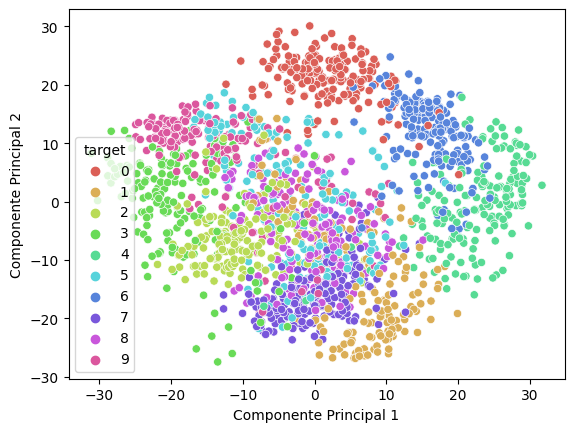

In [8]:
# A continuación proyectamos cada dígito como un punto y lo indicamos con el color
# en una escala categórica de colores
sns.scatterplot(projected, x=0, y=1, hue="target", palette=sns.color_palette("hls", 10))
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

### Reducción de dimensionalidad No lineal con t-SNE de los dígitos

[t-SNE](https://lvdmaaten.github.io/tsne/) es una técnica no lineal, estocástica, de reducción de dimensionalidad. A diferencia de PCA que usa todos los datos para encontrar nuevos atributos (componentes principales) que reducen la varianza de los datos, t-SNE opera localmente: por cada punto identifica vecinos en alta dimensión y los mapea a baja dimensión intentando que sigan cerca.

In [9]:
# Veamos ahora el resultado de esta reducción de dimensionalidad y lo comparamos con PCA
# Como t-SNE es más costoso computacionalmente, agregaremos una instrucción para que nos
# indique el progreso de la reducción de dimensionalidad

#para medir el tiempo
time_start = time.time()

# con **verbose** le indicamos que muestre detalles del proceso
# **n_iter**:  es el número de iteraciones límite, en caso que no converja
# **perplexity**: nos indica aproximadamente cuántos vecinos tomar en cuenta por cada punto 
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300, learning_rate="auto", init="random")

X_embedded = tsne.fit_transform(digits.data)
X_embedded = pd.DataFrame(X_embedded)
X_embedded["target"] = digits["target"]
print('¡t-SNE listo! Tiempo transcurrido: {} segundos'.format(time.time()-time_start))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1797 samples in 0.002s...
[t-SNE] Computed neighbors for 1797 samples in 0.190s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1797
[t-SNE] Computed conditional probabilities for sample 1797 / 1797
[t-SNE] Mean sigma: 11.585657
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.388145
[t-SNE] KL divergence after 300 iterations: 1.339817
¡t-SNE listo! Tiempo transcurrido: 1.469947099685669 segundos


Text(0, 0.5, 'Dimensión 2')

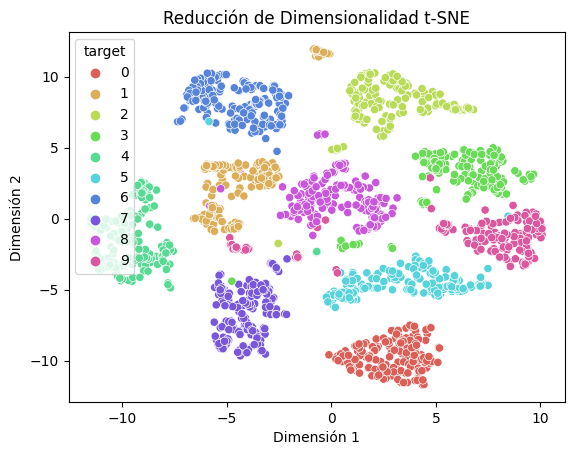

In [10]:
# Ahora graficamos el resultado

sns.scatterplot(X_embedded, x=0, y=1, hue="target", palette=sns.color_palette("hls", 10))
plt.title('Reducción de Dimensionalidad t-SNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')